<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


In [6]:
import numpy as np
'''x=np.arange(18).reshape(6,3)
#max([max(seq) for seq in x])
for seq in x:
  print(max(seq))'''
x=np.arange(9,18).reshape(3,3)
for ind,val in enumerate(x):
  print(ind," ",val)
x.ndim

0   [ 9 10 11]
1   [12 13 14]
2   [15 16 17]


2

In [64]:
from keras.datasets import reuters
from keras import models,layers
from keras.utils.np_utils import to_categorical
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences): 
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)
#we are not using to_categorical for training and testing data because every index has vector of words with assigned interger
'''def  to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension)) 
  for i, label in enumerate(labels): 
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)'''

one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

x_val = x_train[:1000] 
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 304us/step - loss: 0.0732 - acc: 0.9808 - val_loss: 0.0514 - val_acc: 0.9856
Epoch 2/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.0440 - acc: 0.9883 - val_loss: 0.0411 - val_acc: 0.9892
Epoch 3/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.0344 - acc: 0.9908 - val_loss: 0.0366 - val_acc: 0.9903
Epoch 4/9
7982/7982 [==============================] - 1s 162us/step - loss: 0.0283 - acc: 0.9922 - val_loss: 0.0347 - val_acc: 0.9908
Epoch 5/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.0321 - val_acc: 0.9910
Epoch 6/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.0198 - acc: 0.9943 - val_loss: 0.0311 - val_acc: 0.9917
Epoch 7/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.0167 - acc: 0.9951 - val_loss: 0.0306 - val_acc: 0.9917
Epoch 8

In [62]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

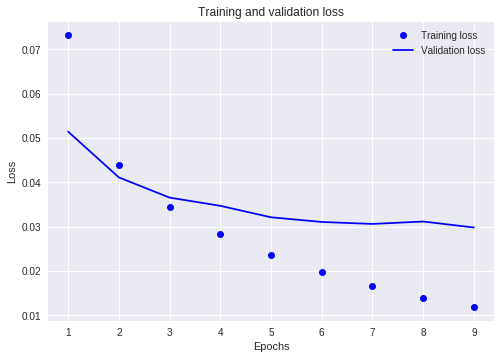

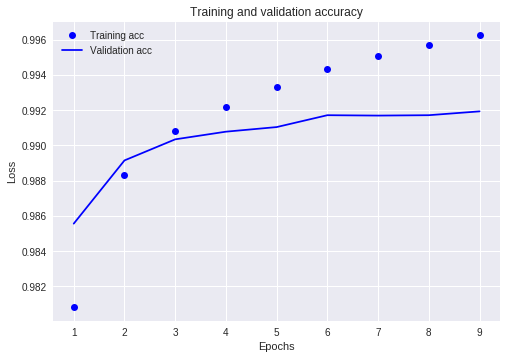

In [65]:
import matplotlib.pyplot as plt
history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()

plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()
plt.show()



## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

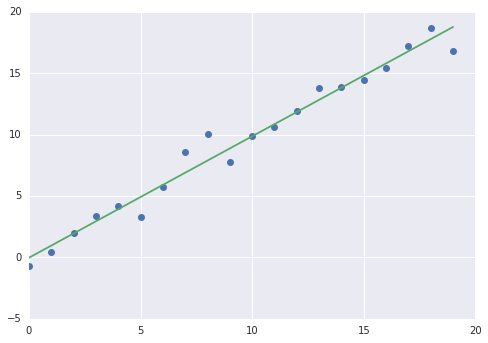

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

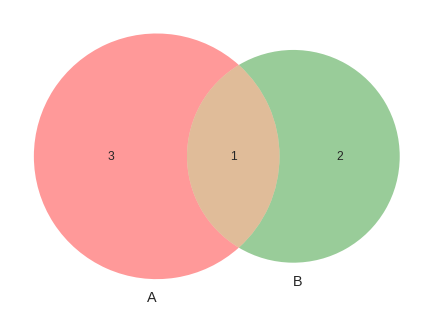

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).